In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
X = pd.read_csv('puredata.csv') 
X = X.drop('actor_id', axis = 1) 
X = X.drop(columns =['Unnamed: 0'])
# 处理丢失的值
# X.fillna(method ='ffill', inplace = True) 
X.head() 

,issuecomment,openissue,openPR,reviewcomment,mergePR
0,1.0,0.0,1.0,14.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,10.0,0.0
3,3.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,3.0,0.0


In [8]:
# 预处理数据，使数据可视化
# 数据比例伸缩
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# 规范化数据
X_normalized = normalize(X_scaled) 

# 将numpy数组转换为pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# 减少数据的纬度
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head() 

,P1,P2
0,0.516743,-0.236504
1,-0.330791,-0.310956
2,0.164206,-0.268682
3,-0.337569,0.441240
4,-0.269721,-0.346775


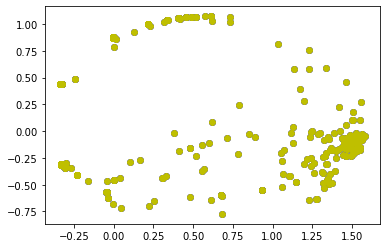

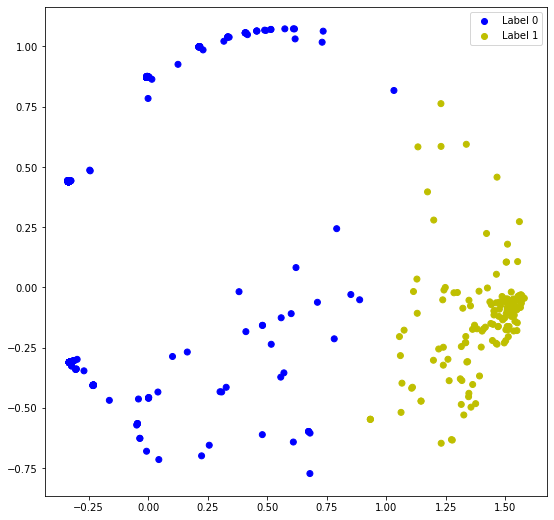

In [9]:
# 构建聚类模型 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 

# 训练模型并存储预测的聚类标签
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 
# filter_none
# brightness_4

# 建立标签到颜色的映射
colours = {} 
colours[0] = 'b'
colours[1] = 'y'

# 为每个数据点构建颜色向量
cvec = [colours[label] for label in labels_rbf] 

# 绘制聚类散点图
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show() 

In [20]:
data  = pd.read_csv('puredata.csv')
data = data.drop(columns =['Unnamed: 0'])
data.insert(data.shape[1], 'label', labels_rbf)
data.head()

,actor_id,issuecomment,openissue,openPR,reviewcomment,mergePR,label
0,29231,1.0,0.0,1.0,14.0,0.0,0
1,64772,1.0,0.0,0.0,0.0,0.0,0
2,328693,4.0,0.0,0.0,10.0,0.0,0
3,548443,3.0,1.0,0.0,0.0,0.0,0
4,552990,0.0,0.0,0.0,3.0,0.0,0


In [ ]:
# 构建聚类模型
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
# 训练模型并存储预测的聚类标签 
labels_nn = spectral_model_nn.fit_predict(X_principal)

# 建立标签到颜色的映射
colours = {} 
colours[0] = 'b'
colours[1] = 'y'

# 为每个数据点构建颜色向量
cvec = [colours[label] for label in labels_rbf] 

# 绘制聚类散点图
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show() 

In [ ]:
data.to_csv('labeldata.csv')

In [11]:
# 工作性能评估 轮廓系数
s_scores = silhouette_score(X, labels_rbf)
# s_scores.append(silhouette_score(X, labels_nn)) 
print(s_scores) 

[0.6161928306606338, -0.31368437353557815]


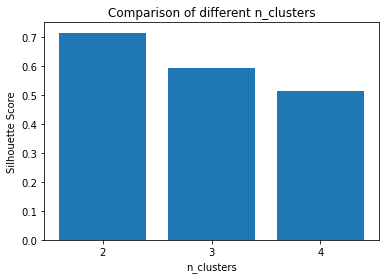

In [11]:
# 绘制条形图来比较模型
models = ['2','3','4']
s_scores = [0.7161928306606338,0.5961928306606338, 0.51368437353557815]
plt.bar(models, s_scores) 
#labels为图例的文字标注，loc为图例放置的位置
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different n_clusters') 
plt.show() 

In [ ]:
import pandas as pd
import numpy as np
from math import ceil
import matplotlib
import matplotlib.pyplot as plt
from scipy import vectorize
from sklearn.linear_model import LinearRegression
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# 设置权重
# 代码贡献
MERGEPULL_WEIGHT = 5 #mpc
OPENPULL_WEIGHT = 3 #opc
PULLREVIEWCOMMENT_WEIGHT = 4 #rcc
# 参与&讨论
OPENISSUE_WEIGHT = 2 #oic
ISSUECOMMENT_WEIGHT = 1 #icc

In [ ]:
df2 = pd.read_csv('labeldata.csv')
df2 = df2.drop(columns =['Unnamed: 0'])
df3 = df2.drop(index=[106,170,132],axis=0)
table = df3.sort_values(by=['code_contribution_score'])
table.tail()

In [ ]:
#按权值计算代码贡献与参与贡献
def get_code_contribution_score(series):
    MERGEPULL = series['mergePR'] * MERGEPULL_WEIGHT
    OPENPULL = series['openPR'] * OPENPULL_WEIGHT
    PULLREVIEWCOMMENT = series['reviewcomment'] * PULLREVIEWCOMMENT_WEIGHT
    code_contribution_score = MERGEPULL+OPENPULL+PULLREVIEWCOMMENT
    return code_contribution_score

def get_participation_score(series):
    OPENISSUE = series['openissue'] * OPENISSUE_WEIGHT
    ISSUECOMMENT = series['issuecomment'] * ISSUECOMMENT_WEIGHT
    participation_score = OPENISSUE + ISSUECOMMENT
    return participation_score

In [ ]:
def draw(df2):
    #画图
    x = df2['code_contribution_score'].tolist()
    y = df2['participation_score'].tolist()

    # #拟合直线
    # lr = LinearRegression()
    # lr.fit(np.array(x).reshape(-1,1),y)
    # x1 = np.array(x).reshape(-1,1)
    # y1 = lr.predict(x1)
    # y1 = vectorize(lambda x:ceil(x))(y1)
    colours = {} 
    colours[0] = 'b'
    colours[1] = 'r'
    # 为每个数据点构建颜色向量
    cvec = [colours[label] for label in df2['label']] 

    #先画散点图
    plt.figure()
    plt.xlabel('code_contribution_score')
    plt.ylabel('participation_score')
    plt.title('人员分类 2021_7-2021_10')

    plt.scatter(x, y, marker='.', c = cvec)
    #plt.savefig('result_v2.jpg')
    plt.show()
draw(df3)
